In [1]:
import sys

sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')

In [8]:
from oyla.mvc.utils import *

In [13]:
import numpy as np
import scipy.io
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def rgba2rgb(source):
    target = np.zeros((source.shape[0],source.shape[1],3))
    bg =[0.5,0.5,0.5]*2
    for i in range(3):
         target[:,:,i] = ((1 - source[:,:,3]) * bg[i]) + (source[:,:,3] * source[:,:,i])
    return target

In [5]:
dir_path='/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/Oct 16 - RG visit Set 3/3_data_October_16_18_05_49//'

In [24]:
#os.makedirs(dir_path+'/kitti/2d/ergb1')
for index in range(500):
    rgb = scipy.io.loadmat(dir_path+'/data_c_'+str(index)+'.mat')

    rgb = rgb['data'][0][4]

    rgb = rgb_depth_view_matching(rgb)
    dist = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'.bin',np.uint16())
    ampl = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'_ampl.bin',np.uint16())
    _rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)
    dist = dist.reshape(120,320)
    ampl = ampl.reshape(120,320)
    im = np.zeros((120,320,4))
    im[:,:,:3]=_rgb/255.0
    dist[ampl>1500]=0
    dist[dist>15000] = 0
    alpha = dist/np.max(dist)
    im[:,:,3] = 1-alpha
    _im = rgba2rgb(im)
    __im = np.rint(_im*255).astype('uint8')
    plt.imsave(dir_path+'/kitti/2d/ergb1/oyla_'+str(index)+'.png',__im)

In [25]:
os.makedirs(dir_path+'/kitti/2d/ergb2')
for index in range(500):
    rgb = scipy.io.loadmat(dir_path+'/data_c_'+str(index)+'.mat')

    rgb = rgb['data'][0][4]

    rgb = rgb_depth_view_matching(rgb)
    dist = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'.bin',np.uint16())
    ampl = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'_ampl.bin',np.uint16())
    _rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)
    dist = dist.reshape(120,320)
    ampl = ampl.reshape(120,320)
    im = np.zeros((120,320,4))
    im[:,:,:3]=_rgb/255.0
    #dist[ampl>1500]=0
    #dist[dist>15000] = 0
    alpha = dist/np.max(dist)
    im[:,:,3] = 1-alpha
    _im = rgba2rgb(im)
    __im = np.rint(_im*255).astype('uint8')
    plt.imsave(dir_path+'/kitti/2d/ergb2/oyla_'+str(index)+'.png',__im)
    

In [6]:
sys.path.append('/Users/rsingh/Packages/closed-form-matting//')

In [7]:
from solve_foreground_background import solve_foreground_background
import closed_form_matting

In [8]:
import os

In [9]:
input_data_folder_name =  dir_path
csv_file = input_data_folder_name+'/parameters.csv'
parameters = read_csv_parameters(csv_file)

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [10]:
ambiguity_distance, range_max, range_min, saturation_flag, adc_flag, mod_freq, ampl_min,reflectivity_thresh = some_common_utility(parameters,0)

In [14]:
filter_params = {}
#filter_parameters = read_csv_parameters("filter_params.csv")
for k in filter_parameters['filter_cmd'].keys():
        #print(parameters['filter_cmd'][k][self.epoch_number])
        try:
                filter_params[k] = int(filter_parameters['filter_cmd'][k][0])
                parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
        except ValueError:
                pass

NameError: name 'filter_parameters' is not defined

In [15]:
#os.makedirs(dir_path+'/kitti/2d/ergb3')
for index in range(1):
    rgb = scipy.io.loadmat(dir_path+'/data_c_'+str(index)+'.mat')

    rgb = rgb['data'][0][4]

    rgb = rgb_depth_view_matching(rgb)
    dist = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'.bin',np.uint16())
    ampl = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'_ampl.bin',np.uint16())
    _rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)
    raw_phase = dist.reshape(120,320)
    raw_ampl = ampl.reshape(120,320)
    filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                                             range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                                             filter_params = filter_params, ambiguity_distance = ambiguity_distance)
    
    trimap = filtered_phase.copy()
    trimap = trimap.astype('float32')
    trimap[raw_ampl>65300] = 0.5
    trimap[raw_ampl<65300] = 1
    trimap[raw_ampl==65300] = 0
    alpha = closed_form_matting.closed_form_matting_with_trimap(_rgb, trimap)
    foreground, background = solve_foreground_background(_rgb, alpha)
    beta = alpha.copy()
    #beta[dist==0] = beta[dist==0]/2
    beta[raw_ampl>=1500] = 0
    beta[raw_ampl<1500]  = 1
    J = 0*foreground
    for i in range(3):
        J[:,:,i] = beta*foreground[:,:,i]+(1-beta)*background[:,:,i]
    J = J-np.min(J)
    J = J/np.max(J)
    #cv2.imwrite(dir_path+'/kitti/2d/ergb3/oyla_'+str(index)+'.png',cv2.cvtColor((J*255).astype('uint8'),cv2.COLOR_BGR2RGB))
    #plt.imsave(dir_path+'/kitti/2d/ergb3/oyla_'+str(index)+'.png',(J*255).astype('uint8'))

In [16]:
plt.imshow(I)

NameError: name 'I' is not defined

In [11]:
import scipy.io
import cv2

In [3]:
def rgb_equalize_histogram(rgb):
    rgb = (rgb*255).astype('uint8')
    hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    _v = cv2.equalizeHist(v)
    hsv = cv2.merge((h,s,_v))
    ergb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    ergb[ergb>255] = 255
    ergb[ergb<0] = 0
    ergb = ergb.astype('float32')/255.0
    return ergb

In [17]:
rgb = scipy.io.loadmat('/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/16_Jan_data_January_16_20_32_18/data_1_105.mat')

In [18]:
rgb = rgb['data']

In [19]:
rgb = rgb[0][4]

In [30]:
rgb = rgb_equalize_histogram(rgb[60:420,:,:].astype('float32')/255)

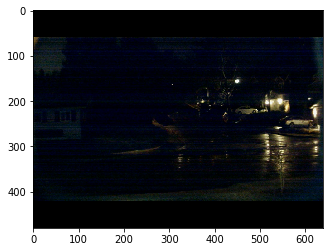

In [20]:
plt.imshow(rgb)

In [23]:
    hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    _v = cv2.equalizeHist(v)
    hsv = cv2.merge((h,s,_v))
    ergb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    ergb[ergb>255] = 255
    ergb[ergb<0] = 0

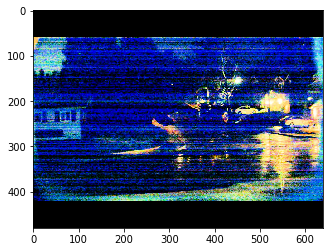

In [32]:
plt.imshow(ergb)

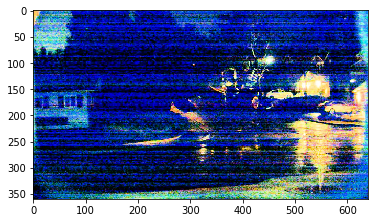

In [31]:
plt.imshow(rgb)